In [1]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
manga = load_dataset('manga.py', trust_remote_code=True, split='train', streaming=True)
manga = iter(manga.with_format('numpy'))

In [3]:
ii = next(manga)

In [4]:
# all IFUs have been padded to a square size of 96 elements. Reject all spaxels by selecting where mask > 0.  
# Padded spaxels have been masked with the MaNGA DRP/DAP quality flag of DONOTUSE, corresponding to value 1024, 1073741824, 
# respectively for DRP data (spaxels/images) and DAP data (maps).

# inspect the entry
print(ii.keys())
print(ii['object_id'], ii['ra'], ii['dec'], ii['z'], ii['healpix'], '\n')

# inspect a spaxel
print('num spaxels', len(ii['spaxels']))
print('spaxel datamodel', ii['spaxels'][0].keys())
print('example spaxel', ii['spaxels'][0], '\n')

# inspect an image
print('num images', len(ii['images']))
print('image datamodel', ii['images'][0].keys())
print('example image', ii['images'][0], '\n')

# inspect a map
print('num maps', len(ii['maps']))
print('maps datamodel', ii['maps'][0].keys())
print('example maps', ii['maps'][0])

dict_keys(['object_id', 'ra', 'dec', 'healpix', 'z', 'spaxel_size', 'spaxel_size_units', 'spaxels', 'images', 'maps'])
8485-12701 233.31922 48.119651 0.0234253 9961 

num spaxels 9216
spaxel datamodel dict_keys(['flux', 'ivar', 'mask', 'lsf', 'lambda', 'x', 'y', 'spaxel_idx', 'flux_units', 'lambda_units', 'skycoo_x', 'skycoo_y', 'ellcoo_r', 'ellcoo_rre', 'ellcoo_rkpc', 'ellcoo_theta', 'skycoo_units', 'ellcoo_r_units', 'ellcoo_rre_units', 'ellcoo_rkpc_units', 'ellcoo_theta_units'])
example spaxel {'flux': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'ivar': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'mask': array([1024., 1024., 1024., ..., 1024., 1024., 1024.], dtype=float32), 'lsf': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'lambda': array([ 3621.596 ,  3622.43  ,  3623.2642, ..., 10349.038 , 10351.422 ,
       10353.806 ], dtype=float32), 'x': array(0), 'y': array(0), 'spaxel_idx': array(0), 'flux_units': "b'1E-17 erg/s/cm^2/Angstrom/spaxel'", 'lambda_unit

Text(0.5, 1.0, 'Reconstructed r-bad PSF')

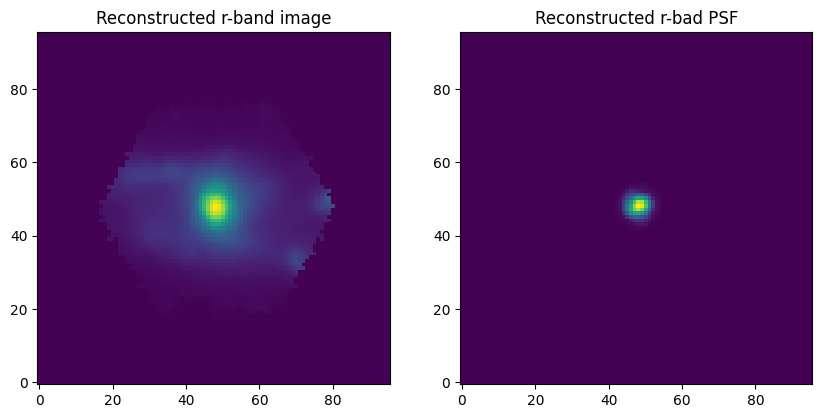

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot r-band image
axs[0].imshow(ii['images'][1]['array'], origin='lower')
axs[0].set_title('Reconstructed r-band image')

# plot r-band psf
axs[1].imshow(ii['images'][1]['psf'], origin='lower')
axs[1].set_title('Reconstructed r-bad PSF')


Text(0.5, 1.0, 'Spaxel at Central Position')

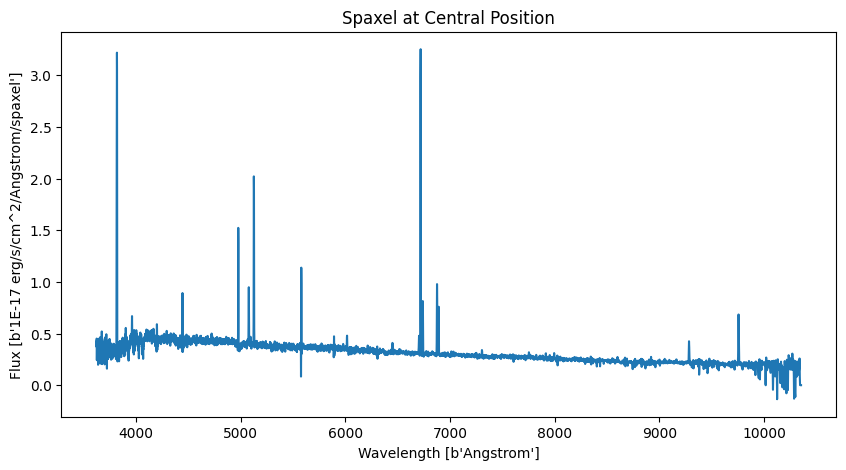

In [6]:
# get the central spaxel by x, y array element index
idx = 48 * 96 + 48
spax = ii['spaxels'][idx]

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(spax['lambda'], spax['flux'])
ax.set_xlabel(f'Wavelength [{spax["lambda_units"]}]')
ax.set_ylabel(f'Flux [{spax["flux_units"]}]')
ax.set_title('Spaxel at Central Position')

Text(0.5, 1.0, 'Spaxel at Central Position')

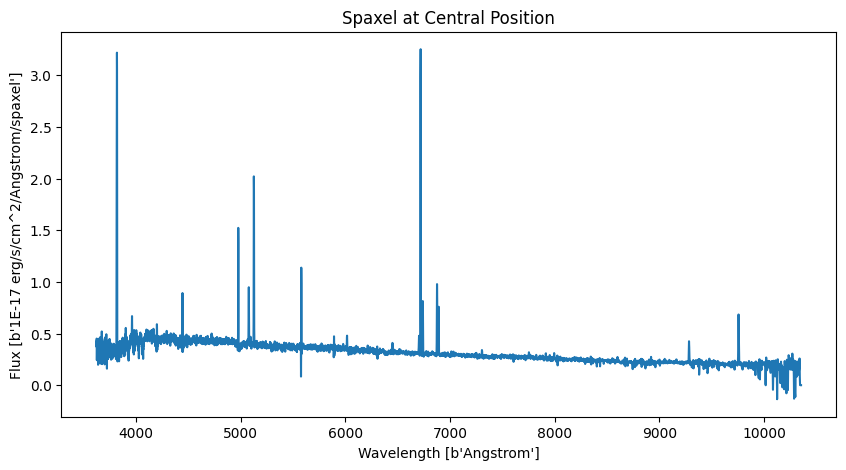

In [7]:
# get the central spaxel by the elliptical coordinate r in arcsec
rcoord = np.array([i["ellcoo_r"].tolist() for i in ii['spaxels']])
# exclude the padded spaxels
mask = rcoord != 0.0  
center_idx = np.where(mask)[0][np.argmin(rcoord[mask])]

spax = ii['spaxels'][center_idx]

# plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(spax['lambda'], spax['flux'])
ax.set_xlabel(f'Wavelength [{spax["lambda_units"]}]')
ax.set_ylabel(f'Flux [{spax["flux_units"]}]')
ax.set_title('Spaxel at Central Position')

In [8]:
def get_a_map(name: str, ii: dict):
    res = [i for i in ii['maps'] if ast.literal_eval(i['label']).decode()==name.lower()]
    if res:
        return res[0]

In [9]:
maps = ii['maps']
stellvel = get_a_map('stellar_vel', ii)
emhalpha = get_a_map('emline_gflux_ha_6564', ii)
d4000 = get_a_map('specindex_d4000', ii)

Text(0.5, 1.0, 'D4000')

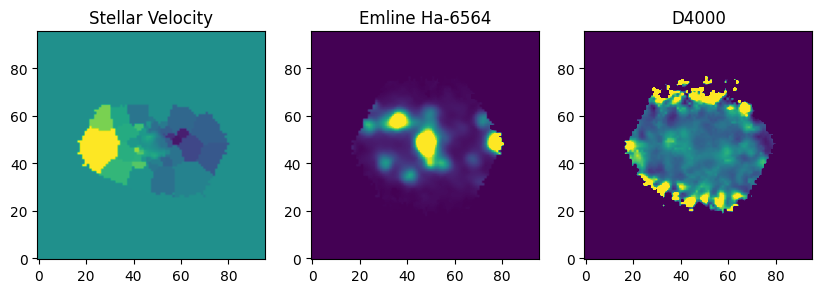

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# plot stellar velocity map
axs[0].imshow(stellvel['array'], origin='lower', vmin=-70, vmax=70)
axs[0].set_title('Stellar Velocity')

# plot H-alpha emission-line gaussian flux map
axs[1].imshow(emhalpha['array'], origin='lower', vmin=0, vmax=5)
axs[1].set_title('Emline Ha-6564')

# plot d4000 spectral index map
axs[2].imshow(d4000['array'], origin='lower', vmin=1, vmax=2)
axs[2].set_title('D4000')
